In [3]:
import pandas as pd

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Q-1: What is the most popular release year for movies on Netflix

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


### Movie DF

In [6]:
movie_df = df[df['type']=='Movie']

In [7]:
movie_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7558,s7559,Movie,Namour,Heidi Saman,"Karim Saleh, Waleed Zuaiter, Nicole Haddad, Mo...",United States,"March 15, 2017",2016,NR,80 min,"Dramas, Independent Movies",Aimless valet driver Steven Bassem can't find ...


In [8]:
movie_df['count']=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
movie_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
6980,s6981,Movie,Ho Mann Jahaan,Asim Raza,"Adeel Hussain, Mahira Khan, Sheheryar Munawar,...",Pakistan,"July 1, 2017",2015,TV-PG,170 min,"Dramas, International Movies, Romantic Movies",Three friends in modern-day Karachi navigate t...,1


In [10]:
movie_df.groupby(['release_year']).sum()['count']

release_year
1942      2
1943      3
1944      3
1945      3
1946      1
1947      1
1954      2
1955      3
1956      2
1958      3
1959      1
1960      4
1961      1
1962      3
1963      1
1964      2
1965      2
1966      1
1967      4
1968      3
1969      2
1970      2
1971      5
1972      4
1973     10
1974      6
1975      7
1976      9
1977      6
1978      7
       ... 
1992     20
1993     24
1994     20
1995     23
1996     21
1997     34
1998     32
1999     32
2000     33
2001     40
2002     44
2003     51
2004     55
2005     67
2006     82
2007     74
2008    113
2009    118
2010    154
2011    145
2012    173
2013    225
2014    264
2015    398
2016    658
2017    767
2018    767
2019    633
2020    517
2021    277
Name: count, Length: 73, dtype: int64

In [11]:
movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

,release_year,count
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
5,1947,1
6,1954,2
7,1955,3
8,1956,2
9,1958,3


In [12]:
release_yr_sum = movie_df.groupby(['release_year']).sum().reset_index()[['release_year','count']]

In [59]:
bst_release = release_yr_sum.sort_values(['count'],ascending=False)
bst_release.head(2)

,release_year,count
69,2018,767
68,2017,767


In [38]:
bst_release_df = bst_release.head(5)
bst_release_df

,release_year,count
69,2018,767
68,2017,767
67,2016,658
70,2019,633
71,2020,517


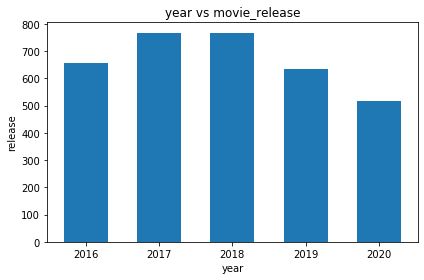

In [62]:
year = bst_release_df['release_year'].to_list()
release = bst_release_df['count']


plt.bar(year,release,0.6,align = 'center')

plt.xlabel('year')
plt.ylabel('release')
plt.title('year vs movie_release')

plt.tight_layout()

plt.show()

## Q2: What year did netflix add the most content to its platform

In [14]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


In [16]:
df['new_date'] = pd.to_datetime(df['date_added'])

df['new_date'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: new_date, dtype: datetime64[ns]

In [17]:
df['date_added_year'] = df['new_date'].dt.year
df['date_added_year'].head()

0    2021.0
1    2021.0
2    2021.0
3    2021.0
4    2021.0
Name: date_added_year, dtype: float64

In [18]:
df['count'] = 1
df.groupby(['date_added_year']).sum()['count']

date_added_year
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: count, dtype: int64

In [19]:
date_added_year_sum = df.groupby(['date_added_year']).sum().reset_index()[['date_added_year','count']]
date_added_year_sum

,date_added_year,count
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,24
7,2015.0,82
8,2016.0,429
9,2017.0,1188


In [69]:
sorted_date_added_year_sum = date_added_year_sum.sort_values(['count'],ascending = False)
sorted_date_added_year_sum

,date_added_year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188
8,2016.0,429
7,2015.0,82
6,2014.0,24
3,2011.0,13
5,2013.0,11


In [71]:
added_year_sum_df = sorted_date_added_year_sum.head(5)
added_year_sum_df

,date_added_year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188


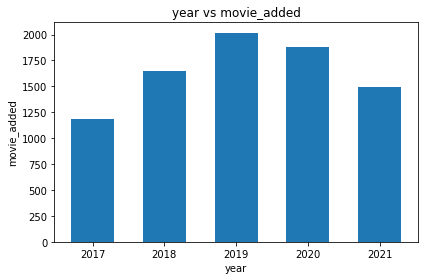

In [76]:
year = added_year_sum_df['date_added_year'].to_list()
release = added_year_sum_df['count']


plt.bar(year,release,0.6,align = 'center')

plt.xlabel('year')
plt.ylabel('movie_added')
plt.title('year vs movie_added')

plt.tight_layout()

plt.show()

## Q3: Independent of Year, what is the most popular month to add new content?

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,2021.0,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,2021.0,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2021.0,1


In [22]:
df['date_added_month'] = df['new_date'].dt.month

In [23]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,1,9.0


In [24]:
df.groupby(['date_added_month']).sum()['count']

date_added_month
1.0     738
2.0     563
3.0     742
4.0     764
5.0     632
6.0     728
7.0     827
8.0     755
9.0     770
10.0    760
11.0    705
12.0    813
Name: count, dtype: int64

In [25]:
date_added_month_sum = df.groupby(['date_added_month']).sum().reset_index()[['date_added_month','count']]
date_added_month_sum.head(3)

,date_added_month,count
0,1.0,738
1,2.0,563
2,3.0,742


In [26]:
date_added_month_sum.sort_values(['count'],ascending=False)

,date_added_month,count
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760
7,8.0,755
2,3.0,742
0,1.0,738
5,6.0,728
10,11.0,705


## Q4: What is the movie longest title?

In [27]:
movie_df = df[df['type']=='Movie']

In [28]:
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,9.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0,1,9.0


In [29]:
movie_df['title_length'] = [len(title) for title in movie_df['title']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
movie_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month,title_length
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,9.0,20
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021-09-24,2021.0,1,9.0,32


In [31]:
top_title_length = movie_df.sort_values(['title_length'],ascending = False)
top_title_length.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month,title_length
5164,s5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,Chris Smith,Jim Carrey,"Canada, United States","November 17, 2017",2017,TV-MA,94 min,Documentaries,Through the lens of his stunningly immersive p...,2017-11-17,2017.0,1,11.0,104
8462,s8463,Movie,The Power of Grayskull: The Definitive History...,"Randall Lobb, Robert McCallum",NaN,"Canada, United States","August 24, 2018",2017,TV-14,96 min,Documentaries,This colorful documentary explores the origins...,2018-08-24,2018.0,1,8.0,88
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was No...,NaN,Mike Birbiglia,United States,"November 22, 2019",2008,TV-MA,56 min,Stand-Up Comedy,Mike Birbiglia performs in this live concert s...,2019-11-22,2019.0,1,11.0,88


In [32]:
longest_title = top_title_length.iloc[0]['title']
print("The longest title of Netflix is- " + "'" + longest_title +"'")

The longest title of Netflix is- 'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'


## Q5: Which Actor/Actress shows up most frequently in the netflix database?

In [33]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_date,date_added_year,count,date_added_month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0,1,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2021.0,1,9.0


In [34]:
title_cast = df[['title', 'cast']]
title_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
7,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
8,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
9,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."


In [35]:
title_cast_df = title_cast.dropna()
title_cast_df.head(2)

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."


In [36]:
cast_name_counter = {}

for index,row in title_cast_df.iterrows():
    movie_cast = row['cast']
    movie_cast_split = movie_cast.split(',')
    movie_cast_stripped = [name.strip().lower() for name in movie_cast_split]
    
    for name in movie_cast_stripped:
        cast_name_counter[name] = cast_name_counter.get(name,0)+1
        
dict(sorted(cast_name_counter.items(), key=lambda item:item[1], reverse = True))

{'anupam kher': 43,
 'shah rukh khan': 35,
 'julie tejwani': 33,
 'naseeruddin shah': 32,
 'takahiro sakurai': 32,
 'rupa bhimani': 31,
 'akshay kumar': 30,
 'om puri': 30,
 'yuki kaji': 29,
 'amitabh bachchan': 28,
 'paresh rawal': 28,
 'boman irani': 27,
 'rajesh kava': 26,
 'vincent tong': 26,
 'andrea libman': 25,
 'kareena kapoor': 25,
 'samuel l. jackson': 24,
 'john cleese': 24,
 'jigna bhardwaj': 23,
 'fred tatasciore': 23,
 'tara strong': 23,
 'daisuke ono': 22,
 'junichi suwabe': 21,
 'ajay devgn': 21,
 'ashleigh ball': 21,
 'kay kay menon': 21,
 'nicolas cage': 21,
 'nawazuddin siddiqui': 21,
 'adam sandler': 20,
 'david attenborough': 20,
 'salman khan': 20,
 'david spade': 19,
 'yuichi nakamura': 19,
 'erin fitzgerald': 19,
 'mamoru miyano': 19,
 'morgan freeman': 19,
 'james franco': 19,
 'seth rogen': 19,
 'ai kayano': 19,
 'fred armisen': 19,
 'gulshan grover': 19,
 'vatsal dubey': 18,
 'rajesh sharma': 18,
 'fortune feimster': 18,
 'diana kaarina': 18,
 'yashpal sharma